In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

data = load_breast_cancer()


df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print("Dimensões do dataset:", df.shape)
print("Classes: 0 = Maligno, 1 = Benigno")
df.head()

Dimensões do dataset: (569, 31)
Classes: 0 = Maligno, 1 = Benigno


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
#Separação das Variáveis (X = características, y = alvo)
X = data.data
y = data.target

# Divisão em Treino (80%) e Teste (20%)
# random_state= 42 garante que os resultados sejam sempre os mesmos (reprodutibilidade)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronização dos Dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Configuração e Treinamento da Rede Neural (MLP)
# Arquitetura: 2 camadas ocultas com 30 e 15 neurônios respectivamente
# Função de ativação: ReLU
# Max_iter: garantir convergência
mlp = MLPClassifier(hidden_layer_sizes=(30, 15),
                    activation='relu',
                    solver='adam',
                    max_iter=1000,
                    random_state=42)

print("Treinando a rede neural")
mlp.fit(X_train_scaled, y_train)
print("Treinamento concluído!")

Treinando a rede neural
Treinamento concluído!


RESULTADOS FINAIS 

Acurácia: 0.9825

Relatório de Classificação:

              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        43
      benign       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



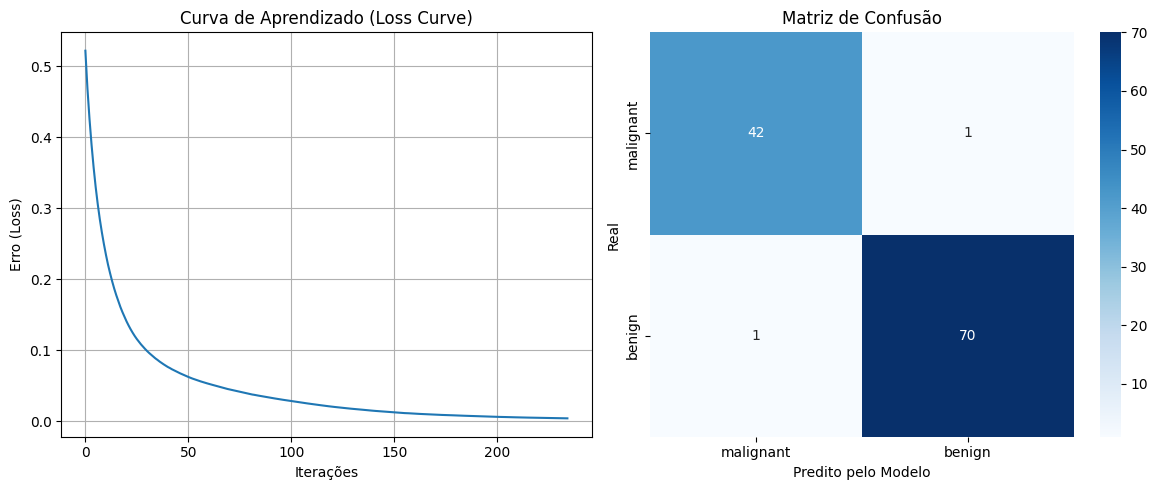

In [ ]:
#  Previsões
y_pred = mlp.predict(X_test_scaled)

# Métricas de Desempenho
print("RESULTADOS FINAIS \n")
print(f"Acurácia: {accuracy_score(y_test, y_pred):.4f}")
print("\nRelatório de Classificação:\n")
print(classification_report(y_test, y_pred, target_names=data.target_names))

#  Gráficos  Relatório

# Gráfico A: Loss Curv - Aprendizado ao longo do tempo
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(mlp.loss_curve_)
plt.title("Curva de Aprendizado (Loss Curve)")
plt.xlabel("Iterações")
plt.ylabel("Erro (Loss)")
plt.grid(True)

# Gráfico B: Matriz de Confusão
plt.subplot(1, 2, 2)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.title("Matriz de Confusão")
plt.ylabel("Real")
plt.xlabel("Predito pelo Modelo")

plt.tight_layout()
plt.show()